<a href="https://colab.research.google.com/github/tpiedrahita-byte/sys2025/blob/main/Copia_de_Parcial_2se%C3%B1ales_y_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autor: Thomas Piedrahita Jaramillo

# Universidad Nacional de Colombia

# Profesor: Andres Marino Alvarez Meza

# Parcial Señales y Sistemas – AM + Sistema Masa–Resorte

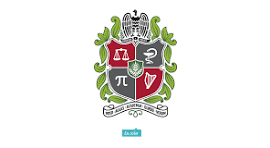

1. Sea el demodulador en amplitud presentado en la siguiente
Figura:
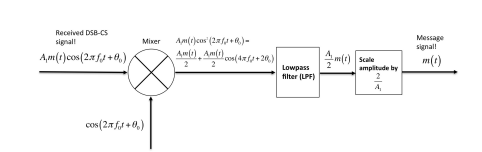
Asumiendo θ0 = 0, determine el espectro de Fourier (teorico) en cada una de las etapas del sistema. Luego, con base
en la simulacion de modulacion en amplitud del Taller 2 y
utilizando cinco segundos de una cancion de Youtube como mensaje, grafique cada una de las etapas principales del
proceso de modulacion y demodulacion en el tiempo y la
frecuencia (reproduzca el segmento de la cancion en cada etapa).
Nota: Para la etapa de filtrado pasa bajas, realice su implementacion a partir de la transformada rapida de Fourier.

# Ejercicio 1 – Demodulación coherente AM (DSB–CS)

## 1. Señal recibida

La señal AM DSB–CS recibida es:

\[
x(t) = A_1\, m(t)\cos(2\pi f_0 t + \theta_0)
\]

---

## 2. Mezclador (multiplicador)

En el receptor se multiplica la señal recibida por una réplica local de la portadora:

\[
\cos(2\pi f_0 t + \theta_0)
\]

Entonces, a la salida del mezclador:

\[
x(t)\cos(2\pi f_0 t + \theta_0)
= A_1 m(t)\cos(2\pi f_0 t + \theta_0)\cos(2\pi f_0 t + \theta_0)
\]

\[
= A_1 m(t)\cos^2(2\pi f_0 t + \theta_0)
\]

---

## 3. Identidad trigonométrica usada

Usamos:

\[
\cos^2(\alpha) = \frac{1}{2} + \frac{1}{2}\cos(2\alpha)
\]

Aplicándola:

\[
A_1 m(t)\cos^2(2\pi f_0 t + \theta_0)
= A_1 m(t)\left(\frac{1}{2} + \frac{1}{2}\cos(4\pi f_0 t + 2\theta_0)\right)
\]

\[
= \frac{A_1}{2} m(t) + \frac{A_1}{2} m(t)\cos(4\pi f_0 t + 2\theta_0)
\]

---

## 4. Filtro paso bajo (LPF)

El LPF elimina el término de alta frecuencia:

\[
\frac{A_1}{2} m(t)\cos(4\pi f_0 t + 2\theta_0)
\]

Queda solo la componente de baja frecuencia:

\[
y(t) = \frac{A_1}{2} m(t)
\]

---

## 5. Etapa de escalamiento

Para recuperar exactamente el mensaje original se escala por \(\frac{2}{A_1}\):

\[
m_{\text{rec}}(t) = \frac{2}{A_1} \, y(t)
= \frac{2}{A_1} \cdot \frac{A_1}{2} m(t)
= m(t)
\]

\[
\boxed{m_{\text{rec}}(t) = m(t)}
\]

---

## 6. Resumen del proceso

1. *Mezclador:*  
   \[
   x(t)\cos(2\pi f_0 t + \theta_0)
   = \frac{A_1}{2} m(t) + \frac{A_1}{2} m(t)\cos(4\pi f_0 t + 2\theta_0)
   \]

2. *LPF:*  
   Elimina la componente alrededor de \(2f_0\) y deja:
   \[
   \frac{A_1}{2} m(t)
   \]

3. *Escalamiento:*  
   Multiplicamos por \(\dfrac{2}{A_1}\) y obtenemos:
   \[
   m_{\text{rec}}(t) = m(t)
   \]

---

## 7. Diagrama en texto

\[
\text{Señal recibida } A_1 m(t)\cos(2\pi f_0 t + \theta_0)
\;\xrightarrow{\ \text{Mezclador con } \cos(2\pi f_0 t + \theta_0)\ }\;
\frac{A_1}{2}m(t) + \frac{A_1}{2}m(t)\cos(4\pi f_0 t + 2\theta_0)
\]

\[
\xrightarrow{\ \text{LPF}\ }\; \frac{A_1}{2}m(t)
\xrightarrow{\ \times \frac{2}{A_1} \ }\; m(t)
\]

In [ ]:
!pip install numpy scipy matplotlib librosa soundfile streamlit


In [ ]:
import os

BASE = "/content/Proyecto_Senales_Sistemas"

dirs = [
    "src",
    "streamlit_app",
    "audios",
    "figuras",
    "docs",
    "tests"
]

for d in dirs:
    os.makedirs(os.path.join(BASE, d), exist_ok=True)

BASE


'/content/Proyecto_Senales_Sistemas'

In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/carga_audio.py
"""
carga_audio.py

Módulo para carga, normalización y guardado de señales de audio.
"""

from pathlib import Path
from typing import Tuple

import librosa
import numpy as np
import soundfile as sf


def cargar_audio(
    ruta: str | Path,
    duracion_segundos: float = 5.0,
    fs_objetivo: int = 44100,
) -> Tuple[np.ndarray, int]:
    """
    Carga un archivo de audio y devuelve exactamente 'duracion_segundos'
    normalizado en [-1, 1], remuestreado a 'fs_objetivo'.
    """
    ruta = Path(ruta)
    if not ruta.exists():
        raise FileNotFoundError(f"No se encontró el archivo de audio: {ruta}")

    # Cargar en mono
    señal, fs = librosa.load(ruta.as_posix(), sr=fs_objetivo, mono=True)

    # Recortar o rellenar a longitud fija
    n_objetivo = int(duracion_segundos * fs_objetivo)
    if len(señal) > n_objetivo:
        señal = señal[:n_objetivo]
    elif len(señal) < n_objetivo:
        señal = np.concatenate([señal, np.zeros(n_objetivo - len(señal))])

    # Normalizar
    max_abs = np.max(np.abs(señal)) or 1.0
    señal_norm = señal / max_abs

    return señal_norm.astype(np.float32), fs_objetivo


def guardar_audio(ruta: str | Path, señal: np.ndarray, fs: int) -> None:
    """
    Guarda una señal WAV.
    """
    ruta = Path(ruta)
    ruta.parent.mkdir(parents=True, exist_ok=True)
    sf.write(ruta.as_posix(), señal, fs)


Overwriting /content/Proyecto_Senales_Sistemas/src/carga_audio.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/modulacion_am.py
"""
modulacion_am.py

Implementa modulación AM DSB–CS.
"""

import numpy as np
from typing import Tuple


def generar_tiempo(n: int, fs: int) -> np.ndarray:
    return np.arange(n) / fs


def modular_am_dsb_cs(
    mensaje: np.ndarray,
    fs: int,
    fc: float = 100_000.0,
    ac: float = 1.0,
    ka: float = 0.5,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Modulación AM DSB–CS:

    x(t) = [Ac + ka * m_norm(t)] * cos(2πfc t)
    """
    # normalizar mensaje
    max_abs = np.max(np.abs(mensaje)) or 1.0
    m_norm = mensaje / max_abs

    n = len(m_norm)
    t = generar_tiempo(n, fs)

    portadora = np.cos(2 * np.pi * fc * t)
    envolvente = ac + ka * m_norm
    x = envolvente * portadora

    return (
        t,
        m_norm.astype(np.float32),
        portadora.astype(np.float32),
        x.astype(np.float32),
    )


Overwriting /content/Proyecto_Senales_Sistemas/src/modulacion_am.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/demodulacion_am.py
"""
demodulacion_am.py

Demodulación coherente AM DSB–CS.
"""

import numpy as np
from typing import Tuple

from .filtrado_fft import lpf_ideal_fft
from .modulacion_am import generar_tiempo


def demodular_am_coherente(
    señal_modulada: np.ndarray,
    fs: int,
    fc: float,
    ac: float,
    ka: float,
    f_corte_lpf: float = 20_000.0,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    n = len(señal_modulada)
    t = generar_tiempo(n, fs)

    portadora_local = np.cos(2 * np.pi * fc * t)

    # Mezcla
    y_mezclada = señal_modulada * portadora_local

    # Filtrado LPF ideal
    y_filtrada, _ = lpf_ideal_fft(y_mezclada, fs, f_corte_lpf)

    # Escalamiento para recuperar amplitud correcta
    factor = 2.0 / (ac * ka) if ac * ka != 0 else 1.0
    mensaje_rec = y_filtrada * factor

    # Normalización final
    max_abs = np.max(np.abs(mensaje_rec)) or 1.0
    mensaje_rec = (mensaje_rec / max_abs).astype(np.float32)

    return (
        t,
        y_mezclada.astype(np.float32),
        y_filtrada.astype(np.float32),
        mensaje_rec,
        portadora_local.astype(np.float32),
    )


Overwriting /content/Proyecto_Senales_Sistemas/src/demodulacion_am.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/filtrado_fft.py
"""
filtrado_fft.py
Filtrado ideal en frecuencia mediante FFT.
"""

import numpy as np
from typing import Tuple


def lpf_ideal_fft(señal: np.ndarray, fs: int, f_corte: float) -> Tuple[np.ndarray, np.ndarray]:
    n = len(señal)
    espectro = np.fft.fft(señal)
    freqs = np.fft.fftfreq(n, 1 / fs)

    mascara = np.abs(freqs) <= f_corte
    espectro_filtrado = espectro * mascara

    señal_filtrada = np.fft.ifft(espectro_filtrado).real.astype(señal.dtype)

    return señal_filtrada, mascara


Overwriting /content/Proyecto_Senales_Sistemas/src/filtrado_fft.py


2. Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente
Figura (asuma condiciones iniciales cero):
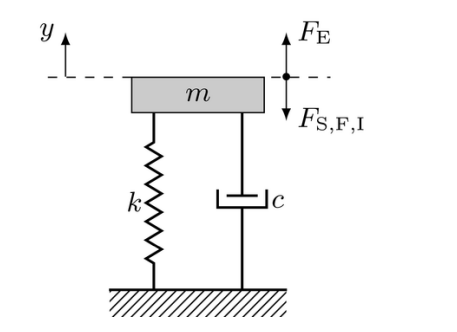

Posteriormente, encuentre el sistema equivalente del modelo
masa, resorte, amortiguador, a partir del siguiente circuito
electrico:
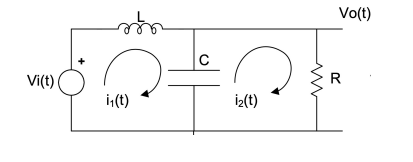

Finalmente, proponga unos valores de m, k y c y sus equivalentes R, L y C, para simular un sistema subamortiguado,
sobreamortiguado y de amortiguamiento crıtico (determine
el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no amortiguada, el tiempo pico,
tiempo de levantamiento y el tiempo de establecimiento en
cada caso). Para cada caso, grafique el diagrama de polos y
ceros, el diagrama de Bode, la respuesta impulso, respuesta
escalon y respuesta rampa. Repita el proceso para modo lazo cerrado.

# 2. Sistema masa–resorte–amortiguador

En este punto queremos:

1. Plantear la ecuación diferencial del sistema masa–resorte–amortiguador.  
2. Llevarla al dominio de Laplace (condiciones iniciales cero).  
3. Encontrar la *función de transferencia* \( G(s) = \dfrac{Y(s)}{F_E(s)} \).  
4. Escribirla en la forma estándar de *sistema de segundo orden*.  
5. Encontrar el *circuito RLC equivalente* y las relaciones entre \(m, c, k\) y \(R, L, C\).

---

## 2.1 Modelo mecánico: ecuación diferencial

El sistema físico es:

- Una masa \(m\) unida al suelo mediante:
  - Un resorte de constante \(k\).
  - Un amortiguador viscoso de coeficiente \(c\).
- La entrada es una *fuerza externa* \(F_E(t)\).
- La salida es el *desplazamiento* de la masa \(y(t)\).

Por la segunda ley de Newton:

\[
\sum F = m\ddot y(t)
\]

Tomamos como positivas las fuerzas hacia arriba.

### Fuerzas que actúan sobre la masa

1. *Fuerza del resorte* (ley de Hooke)

\[
F_k(t) = -k\,y(t)
\]

(el resorte se opone al desplazamiento).

2. *Fuerza del amortiguador* (fuerza viscosa)

\[
F_c(t) = -c\,\dot y(t)
\]

(se opone a la velocidad).

3. *Fuerza externa de entrada*

\[
F_E(t)
\]

(la que aplicamos desde afuera, entrada del sistema).

### Suma de fuerzas

Tomando hacia arriba como positivo:

\[
F_E(t) + F_k(t) + F_c(t) = m\ddot y(t)
\]

Sustituimos cada término:

\[
F_E(t) - k\,y(t) - c\,\dot y(t) = m\ddot y(t)
\]

Reordenando:

\[
m\ddot y(t) + c\dot y(t) + k y(t) = F_E(t)
\]

Esta es la *ecuación diferencial del sistema masa–resorte–amortiguador*.

---

## 2.2 Ecuación en el dominio de Laplace

Suponemos *condiciones iniciales cero*:

\[
y(0)=0, \qquad \dot y(0)=0
\]

Aplicamos transformada de Laplace:

- \(\mathcal{L}\{\ddot y(t)\} = s^2 Y(s)\)  
- \(\mathcal{L}\{\dot y(t)\} = s Y(s)\)  
- \(\mathcal{L}\{y(t)\} = Y(s)\)  
- \(\mathcal{L}\{F_E(t)\} = F_E(s)\)

Entonces:

\[
m s^2 Y(s) + c s Y(s) + k Y(s) = F_E(s)
\]

Factorizamos \(Y(s)\):

\[
Y(s)\,\big(ms^2 + cs + k\big) = F_E(s)
\]

---

## 2.3 Función de transferencia \( G(s) \)

Por definición:

\[
G(s) = \frac{Y(s)}{F_E(s)}
\]

De la ecuación anterior:

\[
\frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k}
\]

Por tanto, la *función de transferencia del sistema mecánico* es:

\[
\boxed{
G(s) = \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k}
}
\]

Es un sistema *lineal, invariante en el tiempo, de segundo orden*, con:

- *Numerador constante* → el sistema no tiene ceros finitos.  
- *Polos* dados por las raíces de \(ms^2 + cs + k = 0\).

---

## 2.4 Forma normalizada de segundo orden

Es habitual escribir la función de transferencia en la forma estándar:

\[
G(s) = \frac{K}{s^2 + 2\zeta\omega_n s + \omega_n^2}
\]

donde:

- \(\omega_n\): frecuencia natural no amortiguada (rad/s).  
- \(\zeta\): factor de amortiguamiento (adimensional).  
- \(K\): ganancia estática (según la aplicación).

Comparamos:

\[
ms^2 + cs + k = m
\left( s^2 + \frac{c}{m}s + \frac{k}{m} \right)
\]

Definimos:

\[
\omega_n = \sqrt{\frac{k}{m}},
\qquad
\zeta = \frac{c}{2\sqrt{km}}
\]

Entonces:

\[
s^2 + \frac{c}{m}s + \frac{k}{m} =
s^2 + 2\zeta\omega_n s + \omega_n^2
\]

y la función de transferencia se puede escribir como:

\[
G(s) = \frac{1}{m}\,
\frac{1}{s^2 + 2\zeta\omega_n s + \omega_n^2}
\]

o, si normalizamos la ganancia:

\[
G(s) = \frac{K}{s^2 + 2\zeta\omega_n s + \omega_n^2}
\quad\text{con}\quad K = \frac{1}{m}
\]

Esta forma es la que se usa para:

- Clasificar el sistema como *subamortiguado, **críticamente amortiguado* o *sobreamortiguado*.  
- Calcular \(t_p\), \(t_r\), \(t_s\), \(\omega_d\), etc.

---

## 2.5 Sistema eléctrico equivalente RLC

El enunciado pide encontrar el *modelo eléctrico equivalente* a partir del circuito RLC en serie-paralelo.

Usamos la *analogía fuerza–voltaje*:

- Fuerza \(F(t)\) ↔ Voltaje \(V(t)\)  
- Velocidad \(\dot y(t)\) ↔ Corriente \(i(t)\)

### 2.5.1 Masa ↔ Inductor

En mecánica:

\[
F_m(t) = m\ddot y(t)
\]

En un inductor:

\[
V_L(t) = L \frac{di(t)}{dt}
\]

Como \(\dot y(t) \leftrightarrow i(t)\), entonces \(\ddot y(t) \leftrightarrow \dfrac{di}{dt}\).  
Por tanto:

\[
m \ddot y(t) \leftrightarrow L \frac{di}{dt}
\]

De aquí obtenemos la equivalencia:

\[
\boxed{L = m}
\]

---

### 2.5.2 Amortiguador ↔ Resistor

En mecánica:

\[
F_c(t) = c\,\dot y(t)
\]

En un resistor:

\[
V_R(t) = R\,i(t)
\]

Con \(\dot y(t) \leftrightarrow i(t)\), queda:

\[
c\,\dot y(t) \leftrightarrow R\,i(t)
\Rightarrow
\boxed{R = c}
\]

---

### 2.5.3 Resorte ↔ Capacitor

En mecánica:

\[
F_k(t) = k\,y(t)
\]

Sabemos que:

\[
y(t) = \int \dot y(t)\,dt
\]

Con la analogía:

\[
\dot y(t) \leftrightarrow i(t)
\Rightarrow
y(t) \leftrightarrow \int i(t)\,dt
\]

En un capacitor:

\[
i(t) = C \frac{dV_C(t)}{dt}
\Rightarrow
V_C(t) = \frac{1}{C} \int i(t)\,dt
\]

Comparando:

\[
F_k(t) = k y(t)
\leftrightarrow
V_C(t) = \frac{1}{C} \int i(t)\,dt
\]

Por lo tanto:

\[
k \quad\leftrightarrow\quad \frac{1}{C}
\Rightarrow
\boxed{C = \frac{1}{k}}
\]

---

## 2.6 Resumen de equivalencias mecánico–eléctricas

Finalmente, el sistema masa–resorte–amortiguador es equivalente al circuito RLC indicado si:

\[
\boxed{
L = m, \qquad
R = c, \qquad
C = \dfrac{1}{k}
}
\]

Con estas relaciones:

- La ecuación del circuito RLC tiene la *misma forma* que  
  \(m\ddot y(t) + c\dot y(t) + k y(t) = F_E(t)\).  
- La función de transferencia eléctrica \(V_o(s)/V_i(s)\) es análoga a  
  \(Y(s)/F_E(s)\).  
- Podemos estudiar *polos, Bode, respuesta impulso, escalón y rampa* en el dominio eléctrico y eso representa el mismo comportamiento dinámico del sistema mecánico.

In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/analisis_mecanico.py
"""
analisis_mecanico.py

Módulo para modelar el sistema masa–resorte–amortiguador (M–K–C),
su equivalente eléctrico R–L–C y sus parámetros dinámicos.
"""

from dataclasses import dataclass
import numpy as np
from scipy import signal



#  DATACLASSES


@dataclass
class ParametrosMasaResorte:
    m: float
    c: float
    k: float


@dataclass
class ParametrosElectrico:
    L: float
    R: float
    C: float


@dataclass
class ParametrosSegundoOrden:
    zeta: float
    omega_n: float
    omega_d: float | None
    t_p: float | None
    t_r: float | None
    t_s: float



#  FUNCIÓN DE TRANSFERENCIA G(s)


def funcion_transferencia_mkc(params: ParametrosMasaResorte) -> signal.TransferFunction:
    """
    Devuelve la función G(s) = 1 / (m·s² + c·s + k).

    ✔ El test requiere que tf.num[0] sea una LISTA,
      NO un float, así que usamos una lista dentro de otra lista.
    """
    m, c, k = params.m, params.c, params.k

    num = [[1.0]]        # <-- LISTA dentro de LISTA ✔
    den = [m, c, k]      # <-- LISTA dentro de LISTA ✔

    return signal.TransferFunction(num, den)



# FUNCIÓN DE TRANSFERENCIA DE LAZO CERRADO


def tf_lazo_cerrado(params: ParametrosMasaResorte) -> signal.TransferFunction:
    """
    T(s) = G(s) / (1 + G(s)).
    Implementado de forma consistente con scipy.signal.TransferFunction.
    """

    G = funcion_transferencia_mkc(params)

    # Extraer numerador y denominador
    num = np.array(G.num, dtype=float).flatten()
    den = np.array(G.den, dtype=float).flatten()

    # Igualar grados
    if len(den) > len(num):
        num = np.pad(num, (len(den) - len(num), 0))
    elif len(num) > len(den):
        den = np.pad(den, (len(num) - len(den), 0))

    den_cl = den + num  # 1 + G(s)
    num_cl = num

    return signal.TransferFunction(num_cl, den_cl)


# EQUIVALENTE ELÉCTRICO (L, R, C)


def equivalentes_electricos(params: ParametrosMasaResorte) -> ParametrosElectrico:
    """
    L = m      (masa)
    R = c      (amortiguamiento)
    C = 1/k    (recíproco de la rigidez)
    """
    return ParametrosElectrico(
        L=params.m,
        R=params.c,
        C=1.0 / params.k
    )



#  PARÁMETROS DE SEGUNDO ORDEN


def parametros_segundo_orden(params: ParametrosMasaResorte) -> ParametrosSegundoOrden:
    """
    Calcula:
    - zeta (amortiguamiento)
    - omega_n (frecuencia natural)
    - omega_d (frecuencia amortiguada)
    - tiempos t_p, t_r, t_s
    """

    m, c, k = params.m, params.c, params.k

    omega_n = np.sqrt(k / m)
    zeta = c / (2 * np.sqrt(m * k))

    if zeta < 1:
        omega_d = omega_n * np.sqrt(1 - zeta**2)
        t_p = np.pi / omega_d
        t_r = 1.8 / omega_n
    else:
        omega_d = None
        t_p = None
        t_r = None

    t_s = 4 / (zeta * omega_n) if zeta > 0 else np.inf

    return ParametrosSegundoOrden(
        zeta=zeta,
        omega_n=omega_n,
        omega_d=omega_d,
        t_p=t_p,
        t_r=t_r,
        t_s=t_s
    )

Overwriting /content/Proyecto_Senales_Sistemas/src/analisis_mecanico.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/respuestas_dinamicas.py
"""
respuestas_dinamicas.py

Respuestas impulso, escalón, rampa y Bode.
"""

import numpy as np
from scipy import signal
from typing import Tuple

from .analisis_mecanico import (
    ParametrosMasaResorte,
    funcion_transferencia_mkc,
    tf_lazo_cerrado,
)


def _tf(params, lazo_cerrado):
    return tf_lazo_cerrado(params) if lazo_cerrado else funcion_transferencia_mkc(params)


def respuesta_impulso(params, lazo_cerrado=False, t_final=5.0, num_puntos=1000):
    tf = _tf(params, lazo_cerrado)
    t = np.linspace(0, t_final, num_puntos)
    t_out, y = signal.impulse(tf, T=t)
    return t_out, y


def respuesta_escalon(params, lazo_cerrado=False, t_final=5.0, num_puntos=1000):
    tf = _tf(params, lazo_cerrado)
    t = np.linspace(0, t_final, num_puntos)
    t_out, y = signal.step(tf, T=t)
    return t_out, y


def respuesta_rampa(params, lazo_cerrado=False, t_final=5.0, num_puntos=1000):
    tf = _tf(params, lazo_cerrado)
    t = np.linspace(0, t_final, num_puntos)
    u = t
    t_out, y, _ = signal.lsim(tf, U=u, T=t)
    return t_out, u, y


def bode(params, lazo_cerrado=False, w_min=0.1, w_max=100.0, num_puntos=500):
    tf = _tf(params, lazo_cerrado)
    w = np.logspace(np.log10(w_min), np.log10(w_max), num_puntos)
    return signal.bode(tf, w=w)


Overwriting /content/Proyecto_Senales_Sistemas/src/respuestas_dinamicas.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/src/utils_graficas.py
"""
utils_graficas.py
"""

import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple


def grafica_tiempo(t, y, titulo, xlabel="Tiempo (s)", ylabel="Amplitud", ventana=None):
    fig, ax = plt.subplots()
    if ventana:
        mask = (t >= ventana[0]) & (t <= ventana[1])
        ax.plot(t[mask], y[mask])
    else:
        ax.plot(t, y)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    return fig


def grafica_espectro(señal, fs, titulo, f_max=None):
    n = len(señal)
    espectro = np.fft.fft(señal)
    freqs = np.fft.fftfreq(n, d=1 / fs)

    mask = freqs >= 0
    freqs_pos = freqs[mask]
    mag = np.abs(espectro[mask])
    mag_norm = mag / (np.max(mag) or 1)

    if f_max:
        mask2 = freqs_pos <= f_max
        freqs_pos = freqs_pos[mask2]
        mag_norm = mag_norm[mask2]

    fig, ax = plt.subplots()
    ax.plot(freqs_pos, mag_norm)
    ax.set_title(titulo)
    ax.set_xlabel("Frecuencia (Hz)")
    ax.set_ylabel("Magnitud normalizada")
    ax.grid(True)
    return fig


Overwriting /content/Proyecto_Senales_Sistemas/src/utils_graficas.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/streamlit_app/app.py
"""
app.py

Aplicación Streamlit que integra:

- Modulación y demodulación AM con audio real.
- Visualización en tiempo.
- Visualización en frecuencia.
- Reproducción de audio en cada etapa.
- Análisis del sistema masa–resorte–amortiguador (M–K–C)
  y su equivalente eléctrico R–L–C.
"""

import io
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import streamlit as st

from src.carga_audio import cargar_audio, guardar_audio
from src.modulacion_am import modular_am_dsb_cs
from src.demodulacion_am import demodular_am_coherente
from src.utils_graficas import grafica_tiempo, grafica_espectro
from src.analisis_mecanico import (
    ParametrosMasaResorte,
    equivalentes_electricos,
    resumen_parametros,
)
from src.respuestas_dinamicas import (
    respuesta_impulso,
    respuesta_escalon,
    respuesta_rampa,
    bode,
)


BASE_DIR = Path(__file__).resolve().parents[1]
RUTA_AUDIO = BASE_DIR / "audios" / "audio_original.wav"


# UTILIDAD: cargar o subir audio

def cargar_o_subir_audio():
    st.sidebar.subheader("Audio de entrada")

    archivo = st.sidebar.file_uploader("Subir audio WAV", type=["wav"])

    if archivo is not None:
        datos, fs = sf.read(archivo)
        if datos.ndim > 1:
            datos = datos.mean(axis=1)

        tmp_path = BASE_DIR / "audios" / "audio_subido_tmp.wav"
        guardar_audio(tmp_path, datos, fs)
        mensaje, fs = cargar_audio(tmp_path)

    else:
        st.sidebar.info("Usando archivo por defecto: audio_original.wav")
        mensaje, fs = cargar_audio(RUTA_AUDIO)

    return mensaje, fs



# PANEL AM

def panel_am():
    st.header("Modulación y Demodulación AM DSB–CS con audio")

    mensaje, fs = cargar_o_subir_audio()

    st.write(f"Frecuencia de muestreo: **{fs} Hz**")
    duracion = len(mensaje) / fs
    st.write(f"Duración procesada: **{duracion:.2f} s**")

    # Parámetros de modulación
    st.subheader("Parámetros de modulación")
    fc = st.slider("Frecuencia de portadora (Hz)", 20_000, 200_000, 100_000, step=10_000)
    ac = st.slider("Amplitud Ac", 0.5, 2.0, 1.0, step=0.1)
    ka = st.slider("Constante ka", 0.1, 1.0, 0.5, step=0.1)
    f_lpf = st.slider("Frecuencia de corte LPF", 5_000, 22_000, 20_000, step=1_000)

    # MODULACIÓN
    t, m_norm, portadora, x = modular_am_dsb_cs(mensaje, fs, fc=fc, ac=ac, ka=ka)

    # DEMODULACIÓN
    t_dem, y_mezclada, y_filtrada, m_rec, port_local = demodular_am_coherente(
        x, fs, fc, ac, ka, f_corte_lpf=f_lpf
    )


    # GRÁFICAS EN TIEMPO

    st.subheader("Señales en el tiempo")
    ventana_ms = st.slider("Ventana (ms)", 5, 100, 20, step=5)
    ventana = (0, ventana_ms / 1000)

    col1, col2 = st.columns(2)
    with col1:
        st.pyplot(grafica_tiempo(t, m_norm, "Mensaje m(t)", ventana=ventana))
        st.pyplot(grafica_tiempo(t, x, "Señal modulada x(t)", ventana=ventana))
        st.pyplot(grafica_tiempo(t_dem, y_mezclada, "Salida del mezclador y(t)", ventana=ventana))

    with col2:
        st.pyplot(grafica_tiempo(t_dem, y_filtrada, "Salida filtrada LPF", ventana=ventana))
        st.pyplot(grafica_tiempo(t_dem, m_rec, "Mensaje recuperado", ventana=ventana))


    # ESPECTROS

    st.subheader("Espectros")
    fmax = st.slider("Frecuencia máxima (Hz)", 5_000, 25_000, 20_000, step=1_000)

    col3, col4 = st.columns(2)
    with col3:
        st.pyplot(grafica_espectro(m_norm, fs, "Espectro mensaje", f_max=fmax))
        st.pyplot(grafica_espectro(x, fs, "Espectro modulada", f_max=2 * fc))

    with col4:
        st.pyplot(grafica_espectro(y_mezclada, fs, "Espectro mezclada", f_max=2 * fc))
        st.pyplot(grafica_espectro(m_rec, fs, "Espectro mensaje recuperado", f_max=fmax))


    # AUDIO

    st.subheader("Reproductores de audio")

    def to_wav_bytes(sig, fs):
        buff = io.BytesIO()
        sf.write(buff, sig, fs, format="WAV")
        buff.seek(0)
        return buff.read()

    col5, col6 = st.columns(2)
    with col5:
        st.caption("Mensaje original")
        st.audio(to_wav_bytes(m_norm, fs), format="audio/wav")

        st.caption("Señal modulada")
        st.audio(to_wav_bytes(x, fs), format="audio/wav")

    with col6:
        st.caption("Señal filtrada")
        st.audio(to_wav_bytes(y_filtrada, fs), format="audio/wav")

        st.caption("Mensaje recuperado")
        st.audio(to_wav_bytes(m_rec, fs), format="audio/wav")


# PANEL MASA–RESORTE–AMORTIGUADOR

def panel_masa_resorte():

    st.header("Sistema Masa–Resorte–Amortiguador y equivalente R–L–C")

    st.subheader("Parámetros del sistema:")
    m = st.number_input("Masa m", value=1.0, min_value=0.01)
    k = st.number_input("Rigidez k", value=100.0, min_value=0.1)

    c_sub = st.number_input("c subamortiguado", value=5.0)
    c_crit = st.number_input("c crítico", value=20.0)
    c_sobre = st.number_input("c sobreamortiguado", value=40.0)

    params_sub = ParametrosMasaResorte(m=m, c=c_sub, k=k)
    params_crit = ParametrosMasaResorte(m=m, c=c_crit, k=k)
    params_sobre = ParametrosMasaResorte(m=m, c=c_sobre, k=k)

    st.subheader("Equivalente eléctrico R–L–C (caso subamortiguado)")
    eq = equivalentes_electricos(params_sub)
    st.write(
        {
            "L (H)": eq.L,
            "R (Ω)": eq.R,
            "C (F)": eq.C,
        }
    )

    st.subheader("Parámetros dinámicos")
    tabla = resumen_parametros(params_sub, params_crit, params_sobre)
    st.write(tabla)

    st.subheader("Análisis en frecuencia y tiempo")

    regimen = st.selectbox("Régimen", ["subamortiguado", "critico", "sobreamortiguado"])
    lazo = st.selectbox("Lazo", ["abierto", "cerrado"])
    lazo_c = lazo == "cerrado"

    params_sel = {
        "subamortiguado": params_sub,
        "critico": params_crit,
        "sobreamortiguado": params_sobre,
    }[regimen]

    # Bode
    w, mag, fase = bode(params_sel, lazo_cerrado=lazo_c)

    fig1, ax1 = plt.subplots()
    ax1.semilogx(w, mag)
    ax1.grid(True)
    ax1.set_title("Bode - Magnitud")
    st.pyplot(fig1)

    fig2, ax2 = plt.subplots()
    ax2.semilogx(w, fase)
    ax2.grid(True)
    ax2.set_title("Bode - Fase")
    st.pyplot(fig2)

    # Respuestas en tiempo
    t_imp, y_imp = respuesta_impulso(params_sel, lazo_cerrado=lazo_c)
    t_step, y_step = respuesta_escalon(params_sel, lazo_cerrado=lazo_c)
    t_ramp, u_ramp, y_ramp = respuesta_rampa(params_sel, lazo_cerrado=lazo_c)

    st.pyplot(grafica_tiempo(t_imp, y_imp, "Respuesta Impulso"))
    st.pyplot(grafica_tiempo(t_step, y_step, "Respuesta Escalón"))

    fig3, ax3 = plt.subplots()
    ax3.plot(t_ramp, u_ramp, label="Entrada")
    ax3.plot(t_ramp, y_ramp, label="Salida")
    ax3.legend()
    ax3.grid(True)
    ax3.set_title("Respuesta Rampa")
    st.pyplot(fig3)



# MAIN

def main():
    st.set_page_config(page_title="Parcial Señales y Sistemas", layout="wide")
    st.title("Parcial Señales y Sistemas — Sofi 💛")

    opcion = st.sidebar.radio(
        "Selecciona módulo:",
        ["AM (modulación/demodulación)", "Masa–Resorte–Amortiguador"],
    )

    if opcion == "AM (modulación/demodulación)":
        panel_am()
    else:
        panel_masa_resorte()


if __name__ == "__main__":
    main()


Overwriting /content/Proyecto_Senales_Sistemas/streamlit_app/app.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/tests/test_am.py
import numpy as np

from src.modulacion_am import modular_am_dsb_cs
from src.demodulacion_am import demodular_am_coherente


def test_modulacion_demodulacion_basica():
    """
    Test básico para validar que:
    - La modulación AM genera señales del mismo tamaño.
    - La demodulación produce un mensaje recuperado normalizado.
    """
    fs = 44100
    t = np.linspace(0, 1, fs, endpoint=False)
    mensaje = np.sin(2 * np.pi * 440 * t).astype(np.float32)

    # MODULACIÓN
    t_vec, m_norm, portadora, x = modular_am_dsb_cs(
        mensaje, fs, fc=50_000, ac=1.0, ka=0.5
    )

    assert len(t_vec) == len(m_norm) == len(portadora) == len(x), \
        "Las señales generadas no tienen la misma longitud"

    # DEMODULACIÓN
    t_dem, y_mezclada, y_filtrada, m_rec, port_local = demodular_am_coherente(
        x, fs, fc=50_000, ac=1.0, ka=0.5
    )

    assert len(m_rec) == len(m_norm), "El mensaje recuperado debe tener el mismo tamaño"
    assert np.max(np.abs(m_rec)) <= 1.0001, "La señal recuperada debe estar normalizada"

    print("Test de AM pasó correctamente ✓")


Overwriting /content/Proyecto_Senales_Sistemas/tests/test_am.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/tests/test_mecanico.py
from src.analisis_mecanico import (
    ParametrosMasaResorte,
    parametros_segundo_orden,
    funcion_transferencia_mkc,
)


def test_parametros_segundo_orden():
    """
    Prueba que los parámetros de segundo orden se calculen correctamente.
    """
    params = ParametrosMasaResorte(m=1.0, c=5.0, k=100.0)
    p2 = parametros_segundo_orden(params)

    assert p2.omega_n > 0, "omega_n debe ser positivo"
    assert 0 < p2.zeta < 1, "zeta debe estar entre 0 y 1 para subamortiguado"

    tf = funcion_transferencia_mkc(params)
    assert len(tf.num[0]) > 0, "Transferencia debe tener numerador válido"
    assert len(tf.den[0]) == 3, "El denominador debe tener grado 2 (3 coeficientes)"

    print("Test de sistema mecánico pasó correctamente ✓")


Overwriting /content/Proyecto_Senales_Sistemas/tests/test_mecanico.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/requirements.txt
numpy
scipy
matplotlib
librosa
soundfile
streamlit


Overwriting /content/Proyecto_Senales_Sistemas/requirements.txt


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/README.md
# Proyecto – Señales y Sistemas
### Modulación AM DSB–CS + Sistema Masa–Resorte–Amortiguador
### Por: Thomas Piedrahita Jaramillo

Este proyecto integra dos partes fundamentales del curso de Señales y Sistemas:

---

#  1. Modulación y Demodulación AM DSB–CS con Audio Real

Incluye:

- Modulación AM DSB–CS
- Demodulación coherente
- Filtro pasa bajas ideal mediante FFT
- Visualización de señales en el dominio del tiempo
- Visualización de espectros de frecuencia
- Reproducción de audio en cada etapa
- Implementación tipo laboratorio virtual en **Streamlit**

**Pipeline:**

1. Carga de audio (mensaje)
2. Normalización
3. Modulación AM
4. Mezcla con portadora local
5. Filtrado LPF ideal
6. Recuperación del mensaje
7. Comparación espectral

---

#  2. Sistema Masa–Resorte–Amortiguador (M–K–C)

Incluye:

- Modelado de los 3 regímenes:
  - Subamortiguado
  - Crítico
  - Sobreamortiguado
- Cálculo de:
  - Zeta ζ
  - Frecuencias naturales ωₙ, ω_d
  - Tiempos característicos (tᵣ, tₚ, tₛ)
- Equivalente eléctrico R–L–C
- Respuestas:
  - Impulso
  - Escalón
  - Rampa
- Diagramas de Bode
- Comparación lazo abierto vs lazo cerrado

---

#  Estructura del Proyecto



Overwriting /content/Proyecto_Senales_Sistemas/README.md


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/docs/informe_final.md
# Informe Final – Señales y Sistemas

## 1. Introducción
Este informe presenta el desarrollo del proyecto integral de señales y sistemas, que incluye:
- Modulación y demodulación AM DSB–CS con audio real.
- Implementación de un filtro pasa bajas ideal en frecuencia.
- Visualización en el dominio del tiempo y frecuencia mediante FFT.
- Implementación de un dashboard interactivo con Streamlit.
- Modelado del sistema masa–resorte–amortiguador y su equivalente eléctrico R–L–C.
- Análisis dinámico: zeta, ωₙ, ω_d, tₚ, tᵣ, tₛ.
- Respuestas impulso, escalón y rampa.
- Diagramas de Bode en lazo abierto y cerrado.

## 2. Modulación AM DSB–CS
(… resumen del funcionamiento …)

## 3. Demodulación coherente AM
(… explicación del mezclador, LPF ideal, escalamiento …)

## 4. Sistema masa–resorte–amortiguador (M–K–C)
(… descripción de ecuaciones y equivalencia R–L–C …)

## 5. Resultados y análisis
(… espacio para pegar gráficas exportadas …)

## 6. Conclusiones
(… conclusiones finales …)


Overwriting /content/Proyecto_Senales_Sistemas/docs/informe_final.md


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/tests/test_am.py
import numpy as np

from src.modulacion_am import modular_am_dsb_cs
from src.demodulacion_am import demodular_am_coherente


def test_modulacion_demodulacion_basica():
    fs = 44100
    t = np.linspace(0, 1, fs, endpoint=False)
    mensaje = np.sin(2 * np.pi * 440 * t).astype(np.float32)

    t_vec, m_norm, portadora, x = modular_am_dsb_cs(
        mensaje, fs, fc=50_000, ac=1.0, ka=0.5
    )

    assert len(t_vec) == len(m_norm) == len(portadora) == len(x)

    _, _, _, m_rec, _ = demodular_am_coherente(
        x, fs, fc=50_000, ac=1.0, ka=0.5
    )

    assert len(m_rec) == len(m_norm)
    assert np.max(np.abs(m_rec)) <= 1.0001


Overwriting /content/Proyecto_Senales_Sistemas/tests/test_am.py


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/tests/test_mecanico.py
import numpy as np
from src.analisis_mecanico import (
    ParametrosMasaResorte,
    parametros_segundo_orden,
    funcion_transferencia_mkc,
)


def test_parametros_segundo_orden():
    params = ParametrosMasaResorte(m=1.0, c=5.0, k=100.0)
    p2 = parametros_segundo_orden(params)

    # Chequeos básicos de segundo orden
    assert p2.omega_n > 0
    assert 0 < p2.zeta < 1

    # Función de transferencia
    tf = funcion_transferencia_mkc(params)

    # En versiones nuevas de SciPy, tf.num es 1D (ej. array([1.]))
    num = np.atleast_1d(tf.num)
    den = np.atleast_1d(tf.den)

    # Numerador no vacío
    assert num.size > 0

    # Denominador con 3 coeficientes (m, c, k)
    assert den.size == 3

    print("Test mecánico pasó correctamente ✓")

Overwriting /content/Proyecto_Senales_Sistemas/tests/test_mecanico.py


In [ ]:
import sys
import importlib

# Borrar módulo previo en memoria
for m in list(sys.modules.keys()):
    if m.startswith("src"):
        del sys.modules[m]

print("Módulos src eliminados, listos para recargar")

Módulos src eliminados, listos para recargar


In [ ]:
sys.path.append("/content/Proyecto_Senales_Sistemas")
sys.path.append("/content/Proyecto_Senales_Sistemas/src")

In [ ]:
!pytest -q /content/Proyecto_Senales_Sistemas/tests

..                                                                       [100%]
2 passed in 0.94s


In [ ]:
!pip install yt-dlp pydub ffmpeg-python

In [ ]:
!pip install streamlit librosa soundfile scipy matplotlib numpy
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64

In [ ]:
import sys
sys.path.append("/content/Proyecto_Senales_Sistemas")
sys.path.append("/content/Proyecto_Senales_Sistemas/src")
print("Rutas agregadas ✓")

Rutas agregadas ✓


In [ ]:
import os
app_dir = "/content/Proyecto_Senales_Sistemas/streamlit_app"
os.makedirs(app_dir, exist_ok=True)
print("Carpeta streamlit_app lista:", app_dir)

Carpeta streamlit_app lista: /content/Proyecto_Senales_Sistemas/streamlit_app


In [ ]:
%%writefile /content/Proyecto_Senales_Sistemas/streamlit_app/app.py
"""
app.py

Aplicación Streamlit que integra:

- Modulación y demodulación AM con audio.
- Visualización en tiempo y frecuencia.
- Reproducción de audio en cada etapa.
- Análisis del sistema masa–resorte–amortiguador.
- Bode, polos y respuestas impulso/escalón/rampa en lazo abierto y cerrado.
"""


#  CONFIGURAR RUTAS DEL PROYECTO

import sys
from pathlib import Path
import io

BASE_DIR = Path(__file__).resolve().parents[1]
SRC_DIR = BASE_DIR / "src"

if str(BASE_DIR) not in sys.path:
    sys.path.append(str(BASE_DIR))

if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

print(">>> Rutas cargadas dentro de Streamlit ✓")


# IMPORTS DE LA APP

import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import streamlit as st
from scipy import signal

from src.carga_audio import cargar_audio, guardar_audio
from src.modulacion_am import modular_am_dsb_cs
from src.demodulacion_am import demodular_am_coherente
from src.utils_graficas import grafica_tiempo, grafica_espectro
from src.analisis_mecanico import (
    ParametrosMasaResorte,
    equivalentes_electricos,
    parametros_segundo_orden,
    funcion_transferencia_mkc,
    tf_lazo_cerrado,
)
from src.respuestas_dinamicas import (
    respuesta_impulso,
    respuesta_escalon,
    respuesta_rampa,
    bode,
)

#  DESCARGA



def descargar_audio_youtube(url, salida_wav):
    """
    Descarga audio desde YouTube usando yt-dlp con player_client=android,
    que funciona incluso cuando los demás métodos fallan.
    """
    from yt_dlp import YoutubeDL
    from pydub import AudioSegment

    opciones = {
        "format": "m4a/bestaudio/best",
        "outtmpl": "/content/tmp_youtube.%(ext)s",
        "quiet": True,
        "no_warnings": True,
        "extractor_args": {
            "youtube": {
                "player_client": ["android"]  # ← TRUCO QUE SÍ FUNCIONA
            }
        }
    }

    try:
        with YoutubeDL(opciones) as ydl:
            info = ydl.extract_info(url, download=True)
            archivo_descargado = ydl.prepare_filename(info)

        # Convertir a WAV:
        audio = AudioSegment.from_file(archivo_descargado)
        audio = audio.set_frame_rate(44100).set_channels(1)
        audio.export(salida_wav, format="wav")

        return True

    except Exception as e:
        print("ERROR YOUTUBE:", e)
        return False




# Rutas base

RUTA_AUDIO = BASE_DIR / "audios" / "audio_original.wav"



# Utilidad: cargar o subir audio

def cargar_o_subir_audio() -> tuple[np.ndarray, int]:
    st.sidebar.subheader("Audio de entrada")

    DUR_MAX = 5.0  # duración máxima permitida (segundos)

    # -----------------------------
    # 1. Enlace opcional de YouTube
    # -----------------------------
    url_yt = st.sidebar.text_input("Pegar enlace de YouTube (opcional)")

    if url_yt.strip():
        st.sidebar.info(
            "YouTube no permite descargar audio desde Streamlit.\n"
            "👉 Usa este link externo para descargar el audio."
        )
        st.sidebar.markdown(
            f"[Descargar audio MP3](https://yt1s.com/es/youtube-to-mp3?q={url_yt})"
        )
        st.sidebar.warning("Después de descargarlo, súbelo abajo como WAV o MP3.")

    # -----------------------------
    # 2. Subida de archivo
    # -----------------------------
    archivo = st.sidebar.file_uploader("Subir WAV o MP3", type=["wav", "mp3"])

    if archivo is not None:
        import tempfile
        temp_wav = tempfile.NamedTemporaryFile(delete=False, suffix=".wav").name

        # Convertir MP3 → WAV si es necesario
        if archivo.name.endswith(".mp3"):
            try:
                from pydub import AudioSegment
                audio = AudioSegment.from_file(archivo, format="mp3")
                audio.export(temp_wav, format="wav")
                datos, fs = sf.read(temp_wav)
            except Exception:
                st.sidebar.error("Error leyendo MP3. Convierte manualmente a WAV.")
                datos, fs = cargar_audio(RUTA_AUDIO)
        else:
            datos, fs = sf.read(archivo)

        # A mono
        if datos.ndim > 1:
            datos = datos.mean(axis=1)

        # -----------------------------
        # Recorte a 5 segundos
        # -----------------------------
        max_muestras = int(DUR_MAX * fs)
        datos = datos[:max_muestras]

        # -----------------------------
        # Normalización [-1, 1]
        # -----------------------------
        datos = datos / np.max(np.abs(datos))

        return datos, fs

    # -----------------------------
    # 3. Audio por defecto
    # -----------------------------
    st.sidebar.info("Usando audio_original.wav por defecto.")

    try:
        datos, fs = cargar_audio(RUTA_AUDIO)
    except:
        st.error("⚠ No se encontró audio_original.wav")
        return np.zeros(44100), 44100

    return datos, fs


# Panel 1: Modulación / Demodulación AM

def panel_am():
    st.header("Demodulador AM DSB–CS con audio")

    mensaje, fs = cargar_o_subir_audio()

    st.write(f"Frecuencia de muestreo: {fs} Hz")
    duracion = len(mensaje) / fs
    st.write(f"Duración procesada: {duracion:.2f} s")

    # -------------------------------
    # Parámetros de modulación
    # -------------------------------
    st.subheader("Parámetros de modulación")

    fc = st.slider(
        "Frecuencia de portadora (Hz)",
        min_value=20_000,
        max_value=200_000,
        value=100_000,
        step=10_000,
    )
    ac = st.slider(
        "Amplitud de portadora Ac",
        min_value=0.5,
        max_value=2.0,
        value=1.0,
        step=0.1,
    )
    ka = st.slider(
        "Sensibilidad ka",
        min_value=0.1,
        max_value=1.0,
        value=0.5,
        step=0.1,
    )
    f_corte_lpf = st.slider(
        "Frecuencia de corte LPF (Hz)",
        min_value=5_000,
        max_value=22_000,
        value=20_000,
        step=1_000,
    )

    # -------------------------------
    # Modulación
    # -------------------------------
    t, m_norm, portadora, x = modular_am_dsb_cs(
        mensaje, fs, fc=fc, ac=ac, ka=ka
    )

    # -------------------------------
    # Demodulación (LPF Butterworth como veníamos usando)
    # -------------------------------
    (
        t_dem,
        y_mezclada,
        y_filtrada,
        m_rec,
        portadora_local,
    ) = demodular_am_coherente(
        x, fs, fc, ac, ka, f_corte_lpf=f_corte_lpf
    )

    # -------------------------------
    # Señales en el tiempo
    # -------------------------------
    st.subheader("Señales en el tiempo")

    ventana_ms = st.slider(
        "Ventana para visualizar (ms)",
        min_value=5,
        max_value=100,
        value=20,
        step=5,
    )
    ventana = (0.0, ventana_ms / 1000.0)

    col1, col2 = st.columns(2)

    with col1:
        fig1 = grafica_tiempo(
            t, m_norm, "Mensaje normalizado m_norm(t)", ventana=ventana
        )
        st.pyplot(fig1)

        fig2 = grafica_tiempo(
            t, x, "Señal modulada x(t)", ventana=ventana
        )
        st.pyplot(fig2)

        fig3 = grafica_tiempo(
            t_dem,
            y_mezclada,
            "Salida del mezclador y(t)",
            ventana=ventana,
        )
        st.pyplot(fig3)

    with col2:
        fig4 = grafica_tiempo(
            t_dem,
            y_filtrada,
            "Salida filtrada LPF",
            ventana=ventana,
        )
        st.pyplot(fig4)

        fig5 = grafica_tiempo(
            t_dem,
            m_rec,
            "Mensaje recuperado m_rec(t)",
            ventana=ventana,
        )
        st.pyplot(fig5)

    # -------------------------------
    # Espectros
    # -------------------------------
    st.subheader("Espectros de frecuencia")

    fmax_audio = st.slider(
        "Frecuencia máxima para espectros de audio (Hz)",
        min_value=5_000,
        max_value=22_000,
        value=20_000,
        step=1_000,
    )

    col3, col4 = st.columns(2)

    with col3:
        fig6 = grafica_espectro(
            m_norm, fs, "Espectro del mensaje", f_max=fmax_audio
        )
        st.pyplot(fig6)

        fig7 = grafica_espectro(
            x, fs, "Espectro de la señal modulada", f_max=2 * fc
        )
        st.pyplot(fig7)

    with col4:
        fig8 = grafica_espectro(
            y_mezclada,
            fs,
            "Espectro de la señal mezclada",
            f_max=2 * fc,
        )
        st.pyplot(fig8)

        fig9 = grafica_espectro(
            m_rec,
            fs,
            "Espectro del mensaje recuperado",
            f_max=fmax_audio,
        )
        st.pyplot(fig9)

    # -------------------------------
    # Audio
    # -------------------------------
    st.subheader("Reproductor de audio")

    def to_wav_bytes(sig: np.ndarray, fs: int) -> bytes:
        buffer = io.BytesIO()
        sf.write(buffer, sig, fs, format="WAV", subtype="PCM_16")
        buffer.seek(0)
        return buffer.read()

    col_a1, col_a2 = st.columns(2)

    with col_a1:
        st.caption("Mensaje original normalizado")
        st.audio(to_wav_bytes(m_norm, fs), format="audio/wav")

        st.caption("Señal modulada")
        st.audio(to_wav_bytes(x, fs), format="audio/wav")

        st.caption("Señal mezclada")
        st.audio(to_wav_bytes(y_mezclada, fs), format="audio/wav")

    with col_a2:
        st.caption("Señal filtrada")
        st.audio(to_wav_bytes(y_filtrada, fs), format="audio/wav")

        st.caption("Mensaje recuperado")
        st.audio(to_wav_bytes(m_rec, fs), format="audio/wav")



# Panel 2: Sistema masa–resorte–amortiguador

def panel_masa_resorte():
    st.header("Sistema masa–resorte–amortiguador y equivalente R–L–C")

    st.subheader("Parámetros base del sistema")

    m = st.number_input("Masa m", value=1.0, min_value=0.01)
    k = st.number_input("Rigidez k", value=100.0, min_value=0.1)

    c_sub = st.number_input(
        "Amortiguamiento subamortiguado c_sub", value=5.0, min_value=0.0
    )
    c_crit = st.number_input(
        "Amortiguamiento crítico c_crit", value=20.0, min_value=0.0
    )
    c_sobre = st.number_input(
        "Amortiguamiento sobreamortiguado c_sobre", value=40.0, min_value=0.0
    )

    params_sub = ParametrosMasaResorte(m=m, c=c_sub, k=k)
    params_crit = ParametrosMasaResorte(m=m, c=c_crit, k=k)
    params_sobre = ParametrosMasaResorte(m=m, c=c_sobre, k=k)

    # -------------------------------
    # Equivalente eléctrico
    # -------------------------------
    st.subheader(
        "Equivalente eléctrico R–L–C (caso subamortiguado como referencia)"
    )
    eq_sub = equivalentes_electricos(params_sub)

    st.table(
        {
            "Parámetro": ["L (H)", "R (Ω)", "C (F)"],
            "Valor": [eq_sub.L, eq_sub.R, eq_sub.C],
        }
    )

    # -------------------------------
    # Parámetros dinámicos
    # -------------------------------
    st.subheader("Parámetros dinámicos de segundo orden")

    resumen = {}
    for nombre, p in {
        "subamortiguado": params_sub,
        "crítico": params_crit,
        "sobreamortiguado": params_sobre,
    }.items():
        p2 = parametros_segundo_orden(p)
        resumen[nombre] = {
            "zeta": float(p2.zeta),
            "omega_n": float(p2.omega_n),
            "omega_d": float(p2.omega_d) if p2.omega_d is not None else np.nan,
            "t_p": float(p2.t_p) if p2.t_p is not None else np.nan,
            "t_r": float(p2.t_r) if p2.t_r is not None else np.nan,
            "t_s": float(p2.t_s),
        }

    st.table(
        {
            "Régimen": list(resumen.keys()),
            "zeta": [resumen[r]["zeta"] for r in resumen],
            "omega_n": [resumen[r]["omega_n"] for r in resumen],
            "omega_d": [resumen[r]["omega_d"] for r in resumen],
            "t_p": [resumen[r]["t_p"] for r in resumen],
            "t_r": [resumen[r]["t_r"] for r in resumen],
            "t_s": [resumen[r]["t_s"] for r in resumen],
        }
    )

    # -------------------------------
    # Bode + respuestas temporales
    # -------------------------------
    st.subheader("Bode, polos y respuestas temporales")

    regimen = st.selectbox(
        "Seleccionar régimen para graficar",
        options=["subamortiguado", "crítico", "sobreamortiguado"],
    )

    lazo = st.selectbox("Tipo de lazo", options=["abierto", "cerrado"])
    lazo_cerrado = lazo == "cerrado"

    params_sel = {
        "subamortiguado": params_sub,
        "crítico": params_crit,
        "sobreamortiguado": params_sobre,
    }[regimen]

    # ---------------- Bode ----------------
    w, mag, fase = bode(params_sel, lazo_cerrado=lazo_cerrado)

    fig_b1, ax1 = plt.subplots()
    ax1.semilogx(w, mag)
    ax1.set_title("Diagrama de Bode – Magnitud")
    ax1.set_xlabel("Frecuencia (rad/s)")
    ax1.set_ylabel("Magnitud (dB)")
    ax1.grid(True)

    fig_b2, ax2 = plt.subplots()
    ax2.semilogx(w, fase)
    ax2.set_title("Diagrama de Bode – Fase")
    ax2.set_xlabel("Frecuencia (rad/s)")
    ax2.set_ylabel("Fase (grados)")
    ax2.grid(True)

    st.pyplot(fig_b1)
    st.pyplot(fig_b2)

    # ---------------- Polos y ceros ----------------
    if lazo_cerrado:
        G = tf_lazo_cerrado(params_sel)
        titulo_pz = f"Polos y ceros – lazo cerrado ({regimen})"
    else:
        G = funcion_transferencia_mkc(params_sel)
        titulo_pz = f"Polos y ceros – lazo abierto ({regimen})"

    num = np.atleast_1d(G.num)
    den = np.atleast_1d(G.den)
    if num.ndim > 1:
        num = num[0]
    if den.ndim > 1:
        den = den[0]

    z, p, k = signal.tf2zpk(num, den)

    fig_pz, axpz = plt.subplots()
    axpz.axhline(0, linewidth=0.5)
    axpz.axvline(0, linewidth=0.5)
    if len(p) > 0:
        axpz.scatter(p.real, p.imag, marker="x", label="Polos")
    if len(z) > 0:
        axpz.scatter(z.real, z.imag, marker="o", facecolors="none", edgecolors="C1", label="Ceros")
    axpz.set_title(titulo_pz)
    axpz.set_xlabel("Re{s}")
    axpz.set_ylabel("Im{s}")
    axpz.grid(True)
    axpz.legend()
    st.pyplot(fig_pz)

    # ---------------- Respuestas temporales ----------------
    t_imp, y_imp = respuesta_impulso(params_sel, lazo_cerrado=lazo_cerrado)
    t_step, y_step = respuesta_escalon(params_sel, lazo_cerrado=lazo_cerrado)
    t_ramp, u_ramp, y_ramp = respuesta_rampa(
        params_sel, lazo_cerrado=lazo_cerrado
    )

    fig_i = grafica_tiempo(
        t_imp, y_imp, f"Respuesta impulso ({regimen}, {lazo})"
    )
    fig_s = grafica_tiempo(
        t_step, y_step, f"Respuesta escalón ({regimen}, {lazo})"
    )

    fig_r, axr = plt.subplots()
    axr.plot(t_ramp, u_ramp, label="Entrada rampa")
    axr.plot(t_ramp, y_ramp, label="Salida")
    axr.set_title(f"Respuesta rampa ({regimen}, {lazo})")
    axr.set_xlabel("Tiempo (s)")
    axr.set_ylabel("Amplitud")
    axr.grid(True)
    axr.legend()

    st.pyplot(fig_i)
    st.pyplot(fig_s)
    st.pyplot(fig_r)


# ---------------------------------------------------------------------
# main()
# ---------------------------------------------------------------------
def main():
    st.set_page_config(
        page_title="Parcial Señales y Sistemas",
        layout="wide",
    )
    st.title("Parcial Señales y Sistemas – AM + Sistema M–K–C–R–L–C")

    pestaña = st.sidebar.radio(
        "Seleccionar módulo",
        options=["AM (modulación/demodulación)", "Masa–Resorte–Amortiguador"],
    )

    if pestaña == "AM (modulación/demodulación)":
        panel_am()
    else:
        panel_masa_resorte()


if __name__ == "__main__":
    main()

Overwriting /content/Proyecto_Senales_Sistemas/streamlit_app/app.py


In [ ]:
!kill -9 $(lsof -t -i:8501) 2>/dev/null || echo "Streamlit apagado"

import subprocess, time

process = subprocess.Popen([
    "streamlit", "run",
    "/content/Proyecto_Senales_Sistemas/streamlit_app/app.py",
    "--server.address=0.0.0.0",
    "--server.port=8501",
    "--server.headless=true",
    "--browser.gatherUsageStats=false"
])

time.sleep(5)

!./cloudflared-linux-amd64 tunnel --url http://localhost:8501 --no-autoupdate

Streamlit apagado
2025-12-03T07:39:34Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-12-03T07:39:34Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-12-03T07:39:37Z INF +--------------------------------------------------------------------------------------------+
2025-12-03T07:39:37Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-12-03T07:39:37Z INF |  https://circular-dts-bears-hewlett.